Dataset : https://www.kaggle.com/datasets/mirichoi0218/insurance

Import library yang akan digunakan

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Unzip dataset

In [ ]:
!unzip "/content/drive/MyDrive/Dataset_Kaggle/Medical Cost Personal Datasets.zip" -d "/content/dataset"

Archive:  /content/drive/MyDrive/Dataset_Kaggle/Medical Cost Personal Datasets.zip
replace /content/dataset/insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Cek data

In [ ]:
insurance = pd.read_csv("/content/dataset/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Cek apakah terdapat nilai null pada data

In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dapat dilihat, tidak ada nilai null

Nilai kategorial dan nlai numerik

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'charges']

Lihat pembagian data pada kolom jenis kelamin

        sampel  persentase
male       676        50.5
female     662        49.5


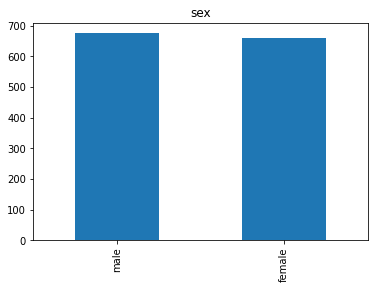

In [ ]:
feature = categorical_features[0]
count = insurance[feature].value_counts()
percent = 100 * insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Cek untuk kolom smoker

     sampel  persentase
no     1064        79.5
yes     274        20.5


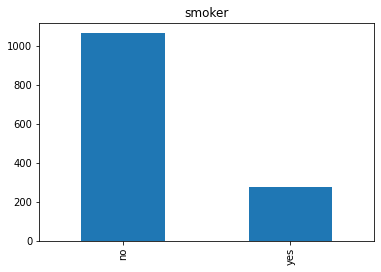

In [ ]:
feature = categorical_features[1]
count = insurance[feature].value_counts()
percent = 100 * insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dapat dilihat pada dataset sekitar 80% pasien merupakan perokok

Cek kolom region

           sampel  persentase
southeast     364        27.2
southwest     325        24.3
northwest     325        24.3
northeast     324        24.2


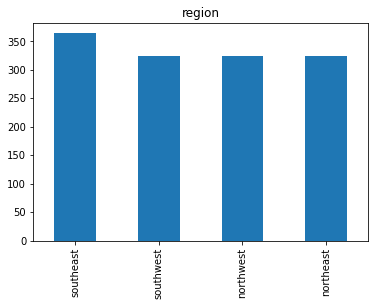

In [ ]:
feature = categorical_features[2]
count = insurance[feature].value_counts()
percent = 100 * insurance[feature].value_counts(normalize=True)
df = pd.DataFrame({'sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

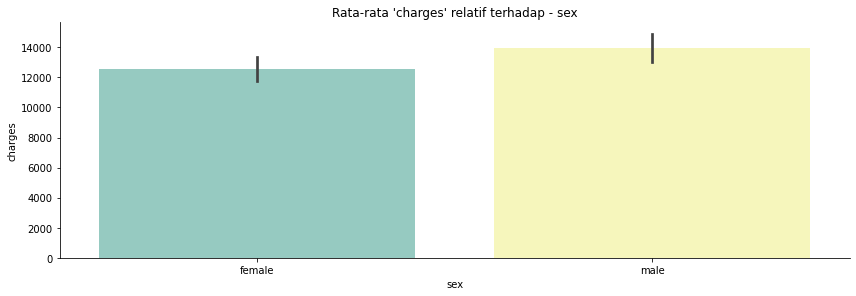

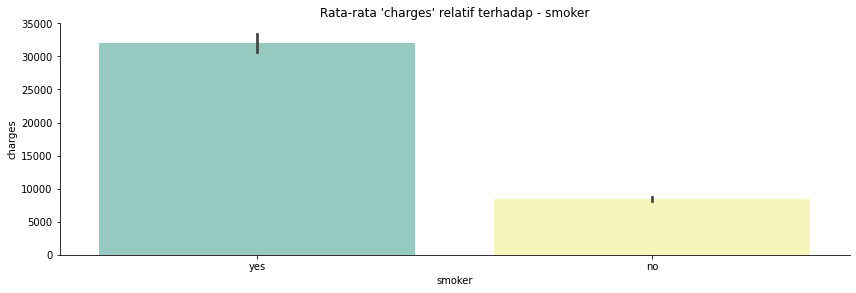

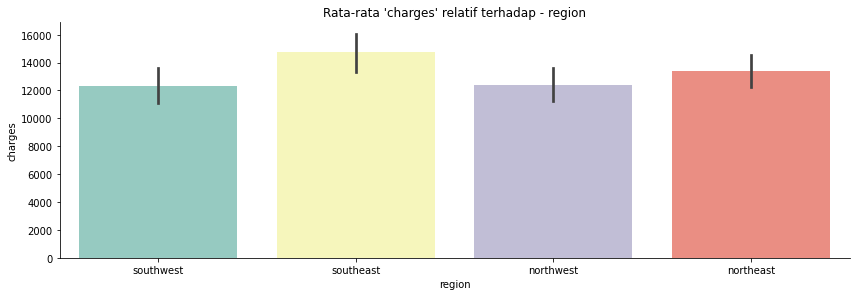

In [ ]:
cat_features = insurance.select_dtypes(include='object').columns.to_list()
for col in cat_features:
  sns.catplot(x=col, y='charges', kind='bar', dodge=False, height=4, aspect=3, data=insurance, palette='Set3')
  plt.title("Rata-rata 'charges' relatif terhadap - {}".format(col))

Dapat dilihat, pada fitur jenis kelamin, perbedaan tidak terlalu signifikan terhadap biaya berobat. sedangkan pada fitur smoker(perokok atau bukan) rata - rata pasien yg merokok memiliki charges/biaya berobat lebih tinggi dibading pasien yg tidak merokok. Untuk fitur region, perbedaan biaya berobat juga tidak terlalu tinggi antar region.

Cek korelasi antar data

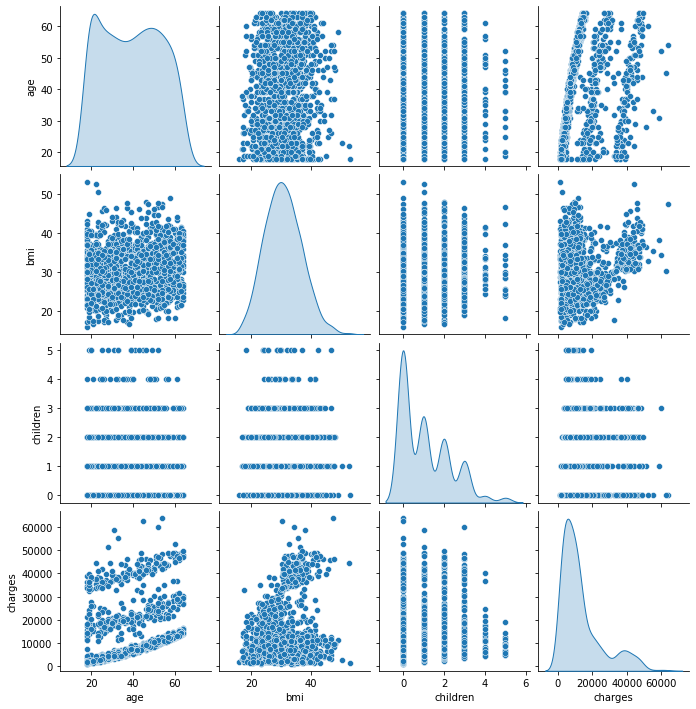

In [ ]:
sns.pairplot(insurance, diag_kind='kde')

In [ ]:
insurance.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'correlation')

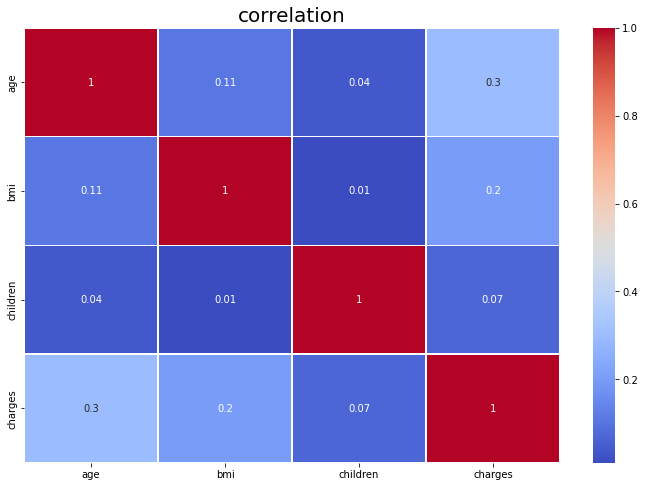

In [ ]:
plt.figure(figsize=(12, 8))
corr = insurance.corr().round(2)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("correlation", size=20)

Data memiliki korelasi yg cukup rendah antar fitur nya

Encoding Fitur Kategori

In [ ]:
insurance = pd.concat([insurance, pd.get_dummies(insurance['sex'], prefix='sex')], axis=1)
insurance = pd.concat([insurance, pd.get_dummies(insurance['smoker'], prefix='smoker')], axis=1)
insurance = pd.concat([insurance, pd.get_dummies(insurance['region'], prefix='region')], axis=1)

Lihat kembali korelasi antar fitur setelah fitur non-numerik di encoding

Text(0.5, 1.0, 'correlation')

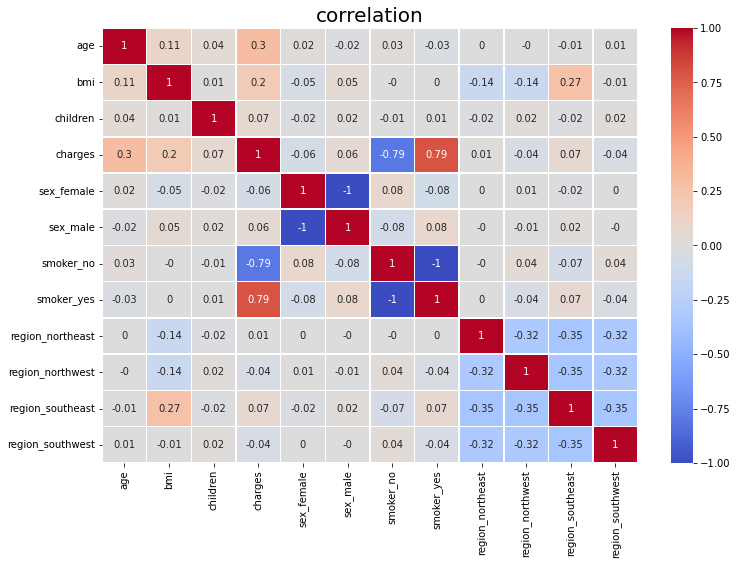

In [ ]:
plt.figure(figsize=(12, 8))
corr = insurance.corr().round(2)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("correlation", size=20)

Dapat terlihat bahwa biaya rumah sakit sangat dipengaruhi oleh perokok atau tidak nya seorang pasien

In [ ]:
insurance.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [ ]:
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance.drop(['charges'], axis=1)

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
x_test = X.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)

In [ ]:
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


Pisahkan label

In [ ]:
y = insurance['charges']

Bagi data train dan data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

cek data

In [ ]:
print(f'total # of sample in whole dataset: {len(X)}')
print(f'total # of sample in whole dataset: {len(X_train)}')
print(f'total # of sample in whole dataset: {len(X_test)}')

total # of sample in whole dataset: 1338
total # of sample in whole dataset: 1137
total # of sample in whole dataset: 201


Normalisasi data dengan StandardScaler

In [ ]:
numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

In [ ]:
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

In [ ]:
y_train.head()

222      5253.52400
631      1977.81500
228      7358.17565
1062    48970.24760
1230    60021.39897
Name: charges, dtype: float64

In [ ]:
X_train[numerical_features].tail()

,age,bmi,children
802,-1.291095,-1.368684,-0.070411
53,-0.224304,0.612680,-0.913117
350,1.269202,-1.224941,-0.913117
79,0.131292,0.373380,-0.913117
792,-1.219975,-1.224941,-0.913117


In [ ]:
X_train[numerical_features].describe().round(4)

,age,bmi,children
count,1137.0000,1137.0000,1137.0000
mean,0.0000,-0.0000,0.0000
std,1.0004,1.0004,1.0004
min,-1.5045,-2.4043,-0.9131
25%,-0.9355,-0.7284,-0.9131
50%,-0.0109,-0.0456,-0.0704
75%,0.8425,0.6731,0.7723
max,1.7670,3.6672,3.3004


Buat dataframe untuk menampung nilai mse

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RF'])

Model KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Model Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=100, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_jobs=-1, random_state=100)

In [ ]:
models.loc['train_mse','RF'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Buat dataframe

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])

Buat dictionary untuk dataframe

In [ ]:
model_dict = {'KNN': knn, 'RF': RF}

Hitung nilai MSE

In [ ]:
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [ ]:
mse

,train,test
KNN,35622.101809,40180.810029
RF,3483.98031,19668.886592


Prediksi 10 nilai

In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF
12,1826.84300,3717.1,3800.2
306,20177.67113,4477.8,4651.7
318,7421.19455,8892.0,13004.2
815,1877.92940,2952.1,2541.5
157,15518.18025,15384.3,19423.4
244,29523.16560,20521.6,29131.4
642,13143.86485,13991.7,13468.0
968,3279.86855,8254.1,5583.8
142,18972.49500,21026.5,19482.2
1034,12950.07120,12598.8,13092.7


Hitung R2 score

In [ ]:
forest_test_pred = RF.predict(X_test)
knn_test_pred = knn.predict(X_test)

In [ ]:
print("R2 score random forest : ", r2_score(y_test, forest_test_pred))
print("R2 score KNN : ", r2_score(y_test, knn_test_pred))

R2 score random forest :  0.8621834263515284
R2 score KNN :  0.7184598356011903


dapat dilihat r2 score sekitar 0.86 pada model Random Forest sedangkan pada model KNN didapatkan r2 score sekitar 0.71. Sehingga di dapatkan bahwa model Random Forest lebih lebih baik daripada KNN pada prediksi studi kasus ini